# Objective : Use Log loss to evaluate various models
1. NB (MultinomialNB)
2. Linear SVM
3. Logistic Regression
3. Stacking (NB, SVM and Logistic Regression)
 
   *   Meta classifier- logistic regression---You can use stacking classifer
   *   use SGDclassfier() to implement SVM and logistic regression




In [89]:
!pip3 install nltk

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
# Loading all required packages
# If any of it fails, do not panic. Just install it using "pip3 install <package_name>" or by using conda install package_name
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
# from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Loading training_variants. Its a comma seperated file
df1=pd.read_csv("training1")
# Loading training_text dataset. This is seperated by ||
df2 =pd.read_csv("training2",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [4]:
df1.head()

,ID,Code1,Code2,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [5]:
df2.head() #ID and Text

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [6]:
print(df1.shape)
print(df2.shape)

(3321, 4)
(3321, 2)


# Question 1: Combine both the datasets using the primary key and drop missing values if any

In [7]:
df3 = pd.merge(df1, df2,)
print(df3.shape)
df3.head()

(3321, 5)


,ID,Code1,Code2,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [8]:
df3=df3.dropna()
df3.shape

(3316, 5)

# Question 2: After combining, you will have "code1", "code2" and "Text" Columns. Firstly in "Text" Column, remove all stop words, replace all special charecters with space, replace multiple spaces with single space and convert all charecters to lower case

In [9]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  

In [10]:
df3['TEXT']

0       Cyclin-dependent kinases (CDKs) regulate a var...
1        Abstract Background  Non-small cell lung canc...
2        Abstract Background  Non-small cell lung canc...
3       Recent evidence has demonstrated that acquired...
4       Oncogenic mutations in the monomeric Casitas B...
                              ...                        
3316    Introduction  Myelodysplastic syndromes (MDS) ...
3317    Introduction  Myelodysplastic syndromes (MDS) ...
3318    The Runt-related transcription factor 1 gene (...
3319    The RUNX1/AML1 gene is the most frequent targe...
3320    The most frequent mutations associated with le...
Name: TEXT, Length: 3316, dtype: object

In [11]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
stop= stopwords.words('english')    
df3['text_without_stopwords'] = df3['TEXT'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [12]:
df3

,ID,Code1,Code2,Class,TEXT,text_without_stopwords
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,Cyclin-dependent kinases (CDKs) regulate varie...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,Abstract Background Non-small cell lung cancer...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,Abstract Background Non-small cell lung cancer...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,Recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,Oncogenic mutations monomeric Casitas B-lineag...
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,Introduction Myelodysplastic syndromes (MDS) h...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,Introduction Myelodysplastic syndromes (MDS) h...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,The RUNX1/AML1 gene frequent target chromosoma...


### removing special characters with space & lower case

In [13]:
df3.text_without_stopwords = df3.text_without_stopwords.replace(r'[<%-/#@!]', ' ', regex=True)

In [14]:
df3.text_without_stopwords

0       Cyclin dependent kinases  CDKs  regulate varie...
1       Abstract Background Non small cell lung cancer...
2       Abstract Background Non small cell lung cancer...
3       Recent evidence demonstrated acquired uniparen...
4       Oncogenic mutations monomeric Casitas B lineag...
                              ...                        
3316    Introduction Myelodysplastic syndromes  MDS  h...
3317    Introduction Myelodysplastic syndromes  MDS  h...
3318    The Runt related transcription factor 1 gene  ...
3319    The RUNX1 AML1 gene frequent target chromosoma...
3320    The frequent mutations associated leukemia rec...
Name: text_without_stopwords, Length: 3316, dtype: object

In [15]:
df3.TEXT=df3.text_without_stopwords
df3.drop(["text_without_stopwords","ID"], axis = 1, inplace = True) 
df3

,Code1,Code2,Class,TEXT
0,FAM58A,Truncating Mutations,1,Cyclin dependent kinases CDKs regulate varie...
1,CBL,W802*,2,Abstract Background Non small cell lung cancer...
2,CBL,Q249E,2,Abstract Background Non small cell lung cancer...
3,CBL,N454D,3,Recent evidence demonstrated acquired uniparen...
4,CBL,L399V,4,Oncogenic mutations monomeric Casitas B lineag...
...,...,...,...,...
3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes MDS h...
3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes MDS h...
3318,RUNX1,Fusions,1,The Runt related transcription factor 1 gene ...
3319,RUNX1,R80C,4,The RUNX1 AML1 gene frequent target chromosoma...


In [16]:
df3.TEXT=df3.TEXT.str.lower()
df3

,Code1,Code2,Class,TEXT
0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate varie...
1,CBL,W802*,2,abstract background non small cell lung cancer...
2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...
...,...,...,...,...
3316,RUNX1,D171N,4,introduction myelodysplastic syndromes mds h...
3317,RUNX1,A122*,1,introduction myelodysplastic syndromes mds h...
3318,RUNX1,Fusions,1,the runt related transcription factor 1 gene ...
3319,RUNX1,R80C,4,the runx1 aml1 gene frequent target chromosoma...


# Question 3: Split your data into training data, validation data and testing data

In [17]:
col_name="Class"
first_col = df3.pop(col_name)
df3.insert(3, col_name, first_col)
df3.head()

,Code1,Code2,TEXT,Class
0,FAM58A,Truncating Mutations,cyclin dependent kinases cdks regulate varie...,1
1,CBL,W802*,abstract background non small cell lung cancer...,2
2,CBL,Q249E,abstract background non small cell lung cancer...,2
3,CBL,N454D,recent evidence demonstrated acquired uniparen...,3
4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...,4


In [18]:
X=df3.iloc[:,:3]
y=df3.iloc[:,3]

### 60% - training ,20%-validaation , 20%-test 

In [19]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp ,test_size=0.25, random_state=1111)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1989, 3)
(664, 3)
(663, 3)
(1989,)
(664,)
(663,)


# Question 4: Calculate log loss on random prob. generated for cv data and actual prob of cv.

In [23]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data_enc = encoder.fit_transform(df3)
data_enc=pd.DataFrame(data_enc)
data_enc

,0,1,2,3
0,84.0,2626.0,479.0,0.0
1,38.0,2853.0,48.0,1.0
2,38.0,1895.0,48.0,1.0
3,38.0,1665.0,1299.0,2.0
4,38.0,1445.0,1153.0,3.0
...,...,...,...,...
3311,219.0,306.0,843.0,3.0
3312,219.0,28.0,841.0,0.0
3313,219.0,807.0,1670.0,0.0
3314,219.0,2247.0,1673.0,3.0


In [28]:
X=data_enc.iloc[:,:3]
y=data_enc.iloc[:,3]

In [29]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp ,test_size=0.25, random_state=1111)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.08484779, 0.08094087, 0.08834808, 0.10165126, 0.07627765])

In [36]:
calibrator = CalibratedClassifierCV(clf, cv=3)
calibrator.fit(X_train, y_train)
# evaluate the model
yhat = calibrator.predict(X_val)

In [37]:
#print metrics function
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

In [38]:
print_score(calibrator, X_train, X_test, y_train, y_test, train=True)
print_score(calibrator, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.2946

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       357
         1.0       0.00      0.00      0.00       252
         2.0       0.00      0.00      0.00        55
         3.0       0.33      0.04      0.06       400
         4.0       0.00      0.00      0.00       140
         5.0       0.00      0.00      0.00       180
         6.0       0.29      1.00      0.45       574
         7.0       0.00      0.00      0.00        10
         8.0       0.00      0.00      0.00        21

    accuracy                           0.29      1989
   macro avg       0.07      0.11      0.06      1989
weighted avg       0.15      0.29      0.14      1989


Confusion Matrix: 
 [[  0   0   0  10   0   0 347   0   0]
 [  0   0   0   5   0   0 247   0   0]
 [  0   0   0   0   0   0  55   0   0]
 [  0   0   0  14   0   0 386   0   0]
 [  0   0   0   3   0   0 137   0   0]
 [  0   0   0  

# Question 5: Identify the predicted class from probability mass distribution of each row

# Question 6: Visualize confusion matrix of Random Model using heat map.

In [42]:
clf=RandomForestClassifier(n_estimators = 500, random_state = 0)
clf.fit(X_train,y_train)
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[189,   8,   2,  69,  27,  17,  43,   0,   2],
       [ 13,  77,   1,  14,   6,   2, 139,   0,   0],
       [  6,   1,  10,  11,   3,   4,  20,   0,   0],
       [ 77,  13,  11, 242,  12,   7,  35,   0,   3],
       [ 31,   6,   1,  21,  41,  11,  29,   0,   0],
       [ 20,   7,   0,  16,  10,  92,  35,   0,   0],
       [ 20,  63,   9,  30,   7,   7, 437,   0,   1],
       [  1,   0,   0,   2,   0,   0,   3,   3,   1],
       [  2,   0,   0,   4,   0,   0,   3,   1,  11]], dtype=int64)

In [47]:
mat=confusion_matrix(y_train, y_train_pred)
mat=pd.DataFrame(mat)
mat.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.132663,0.066607,0.464828,0.528887,0.038114,-0.097850,-0.314883,-0.038557
1,-0.132663,1.000000,0.142739,-0.058192,-0.146127,-0.174080,0.771045,-0.328589,-0.281048
2,0.066607,0.142739,1.000000,0.576845,-0.143467,-0.272923,0.372569,-0.393280,-0.164181
3,0.464828,-0.058192,0.576845,1.000000,0.155141,-0.084684,-0.069641,-0.277296,0.056472
4,0.528887,-0.146127,-0.143467,0.155141,1.000000,0.105772,-0.111064,-0.424275,-0.296973
5,0.038114,-0.174080,-0.272923,-0.084684,0.105772,1.000000,-0.112281,-0.262871,-0.264088
6,-0.097850,0.771045,0.372569,-0.069641,-0.111064,-0.112281,1.000000,-0.282877,-0.209741
7,-0.314883,-0.328589,-0.393280,-0.277296,-0.424275,-0.262871,-0.282877,1.000000,0.209246
8,-0.038557,-0.281048,-0.164181,0.056472,-0.296973,-0.264088,-0.209741,0.209246,1.000000


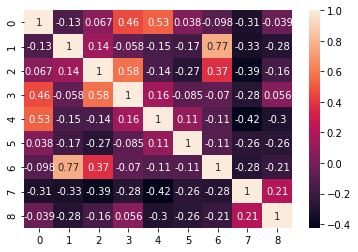

In [48]:
sns.heatmap(mat.corr(), annot=True)
plt.show()

# Question 7: Are all columns important for class prediction?

## Hint: 

## For code1 column

* Pre-step: Apply one hot encoding using countvectorizer()

* A. use "SGD Classifier" with loss=log. Also, use CalibratedClassifierCV() with method=sigmoid to get the probabilities. 

* B. Apply fit() on one hot encoded traininig data of code 1 feature  and predict_proba on one hot encoded cross validation data of gene feature.

* C. Do the above process for multiple alphas and identify the best alpha with least log loss


* D. Take the best alpha value and run above A and B steps and check whether log loss is less than random log loss. If yes, then genemic feature is useful in preciting the class.

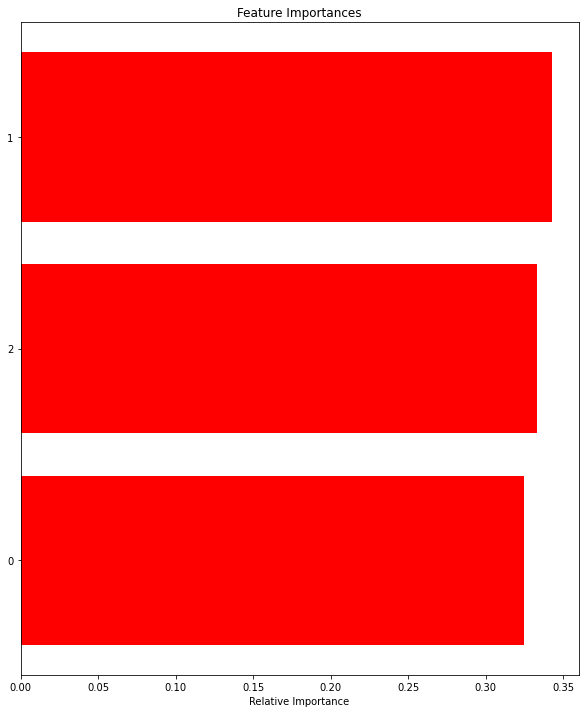

In [39]:
clf=RandomForestClassifier(n_estimators = 500, random_state = 0)
clf.fit(X_train,y_train)
features = X_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer\
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(df3.TEXT)


In [ ]:
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df3).toarray())
enc_df

# Question 8: Apply the same steps for "code2" column and identify whether it is important or not w.r.t to class label.

# Question 9: Apply the same steps for "Text" Column and identify whether it is important or not.

* Hint: Perform one hot encoding of only words with frequency min=3. USe countvectorizer() for one hot encoding.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(df3.TEXT)

CountVectorizer()

In [87]:
df3.TEXT

0        479
1         48
2         48
3       1299
4       1153
        ... 
3316     843
3317     841
3318    1670
3319    1673
3320    1521
Name: TEXT, Length: 3316, dtype: int32

# Question 10: All One hot encoding columns, should be merged if you have done individually. Otherwise, directly print the entire dataset in one hot encoded format except the ID column.

In [54]:
df3

,Code1,Code2,TEXT,Class
0,FAM58A,Truncating Mutations,cyclin dependent kinases cdks regulate varie...,1
1,CBL,W802*,abstract background non small cell lung cancer...,2
2,CBL,Q249E,abstract background non small cell lung cancer...,2
3,CBL,N454D,recent evidence demonstrated acquired uniparen...,3
4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...,4
...,...,...,...,...
3316,RUNX1,D171N,introduction myelodysplastic syndromes mds h...,4
3317,RUNX1,A122*,introduction myelodysplastic syndromes mds h...,1
3318,RUNX1,Fusions,the runt related transcription factor 1 gene ...,1
3319,RUNX1,R80C,the runx1 aml1 gene frequent target chromosoma...,4


In [55]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [56]:
categorical_cols = ['Code1', 'Code2','TEXT','Class'] 
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df3[categorical_cols] =df3[categorical_cols].apply(lambda col: le.fit_transform(col))
one_hot_encoded_cols=pd.DataFrame(df3[categorical_cols])
one_hot_encoded_cols

,Code1,Code2,TEXT,Class
0,84,2626,479,0
1,38,2853,48,1
2,38,1895,48,1
3,38,1665,1299,2
4,38,1445,1153,3
...,...,...,...,...
3316,219,306,843,3
3317,219,28,841,0
3318,219,807,1670,0
3319,219,2247,1673,3


# Question 11: Run Multinomial NB 

* (MultinomialNB(alpha=i)) --> CalibratedClassifierCV(method=sigmoid) --> fit(train_one_hot encoding) --> predict_proba(cross validation onehotCoding) --> log_loss(actual cv values , output of predict)).

* Finally print the confusion matrix using heatmap and log loss with best alpha

In [57]:
X=one_hot_encoded_cols.iloc[:,:3]
y=one_hot_encoded_cols.iloc[:,3]

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp ,test_size=0.25, random_state=1111)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1989, 3)
(664, 3)
(663, 3)
(1989,)
(664,)
(663,)


In [59]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha=1)

In [60]:
n_samples=500
y[:n_samples // 2] = 0
y[n_samples // 2:] = 1

In [61]:
sample_weight = np.random.RandomState(42).rand(y.shape[0])
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X, y, sample_weight, test_size=0.9, random_state=42)
# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(MNB, cv=2, method='sigmoid')
clf_sigmoid.fit(X_train, y_train, sample_weight=sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]
prob_pos_sigmoid


array([0.91888649, 0.93632092, 0.95601755, ..., 0.95601755, 0.91888649,
       0.91888649])

In [62]:
enc = OneHotEncoder(handle_unknown = 'ignore')
encoding_fit=enc.fit(df3)
encoding_fit

OneHotEncoder(handle_unknown='ignore')

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

In [64]:
from sklearn.model_selection import cross_val_score
actual_ = cross_val_score(MNB, X, y, cv=10)
actual_.shape

(10,)

In [65]:
y1=np.array(y)
cv_strat = StratifiedKFold(len(y1), True)

In [66]:
proba = cross_val_predict(MNB, X, y, cv=10, method='predict_proba')
proba.shape

(3316, 2)

In [67]:
import sklearn.metrics as metrics
log_loss_calc = metrics.log_loss(y, proba)
print("Calculate log loss is:", log_loss_calc)

Calculate log loss is: 11.74246626853833


In [68]:
MNB.fit(X_train, y_train)
predict_y=MNB.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=MNB.classes_, eps=1e-15))

The log loss is: 9.00557758698547


In [69]:
MNB.fit(X, y)
pred=MNB.predict(X)
pred.shape

(3316,)

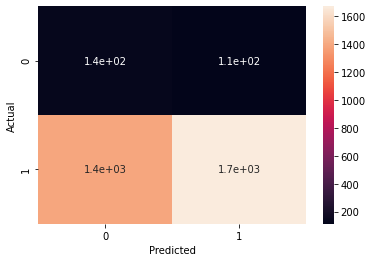

In [70]:
df = pd.DataFrame(one_hot_encoded_cols, columns=[y,pred])
confusion_matrix = pd.crosstab(y, pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

For values of alpha =  1e-05 The log loss is: 0.271610568198789
For values of alpha =  0.0001 The log loss is: 0.271610568198789
For values of alpha =  0.001 The log loss is: 0.271610568198789
For values of alpha =  0.01 The log loss is: 0.271610568198789
For values of alpha =  0.1 The log loss is: 0.2720121130163555
For values of alpha =  1 The log loss is: 0.2727462005694686
For values of alpha =  10 The log loss is: 0.27262995621582625


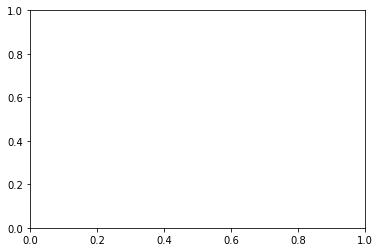

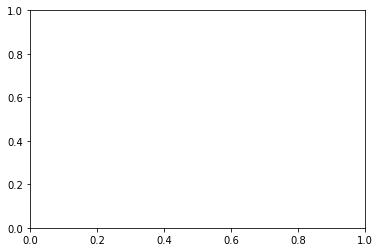

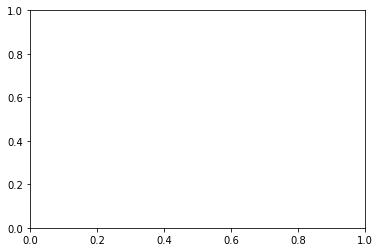

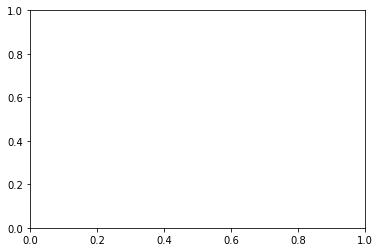

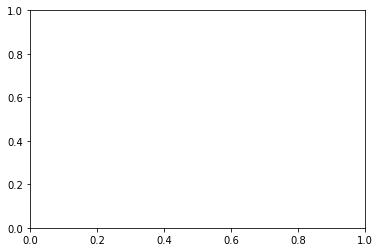

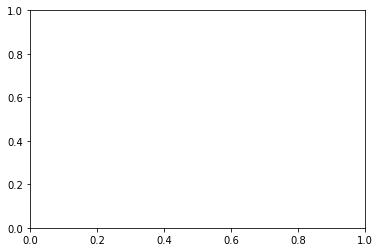

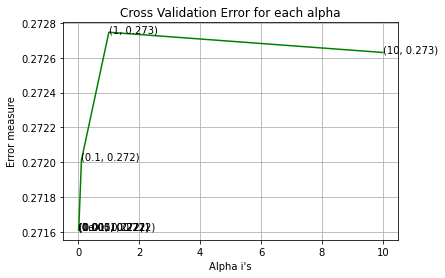

For values of best alpha =  1e-05 The train log loss is: 0.2294257162674744
For values of best alpha =  1e-05 The test log loss is: 0.271610568198789
Total number of data points : 2985


In [71]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.log_error_array=[]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

# Question 12: Run KNN using the above step

In [72]:
knn = KNeighborsClassifier(n_neighbors=7)   
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [73]:
sample_weight = np.random.RandomState(42).rand(y.shape[0])
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X, y, sample_weight, test_size=0.9, random_state=42)
# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(knn, cv=2, method='sigmoid')
clf_sigmoid.fit(X_train, y_train, sample_weight=sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]
prob_pos_sigmoid


array([0.94075598, 0.94795001, 0.93125648, ..., 0.94075598, 0.93681031,
       0.93681031])

In [74]:
proba_knn = cross_val_predict(knn, X, y, cv=10, method='predict_proba')
proba_knn

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.14285714, 0.85714286]])

In [75]:
log_loss_calc = metrics.log_loss(y, proba_knn)
print("Calculate log loss is:", log_loss_calc)

Calculate log loss is: 1.3305981614255287


In [76]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=7)

In [77]:
pred_knn=knn.predict(X)
pred_knn.shape

(3316,)

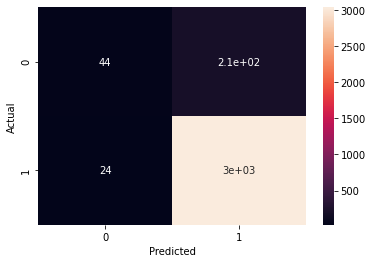

In [78]:
df = pd.DataFrame(one_hot_encoded_cols, columns=[y,pred_knn])
confusion_matrix = pd.crosstab(y, pred_knn, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Question 13: Implement stacking with meta classifier as logistic regression and base classifiers as- Linear SVM, logistic and Multinomial NB. Print the final log loss

In [79]:
from sklearn.ensemble import StackingClassifier

In [80]:
models = [('lr',LogisticRegression()),('svm',SVC()),('mnb',MultinomialNB())]
stacking = StackingClassifier(estimators=models)
stacking

StackingClassifier(estimators=[('lr', LogisticRegression()), ('svm', SVC()),
                               ('mnb', MultinomialNB())])

In [81]:
proba_stacking = cross_val_predict(stacking, X, y, cv=10, method='predict_proba')
proba_stacking

array([[0.06872673, 0.93127327],
       [0.06924574, 0.93075426],
       [0.0689805 , 0.9310195 ],
       ...,
       [0.07936653, 0.92063347],
       [0.08011599, 0.91988401],
       [0.08012706, 0.91987294]])

In [82]:
stacking.fit(X, y)

StackingClassifier(estimators=[('lr', LogisticRegression()), ('svm', SVC()),
                               ('mnb', MultinomialNB())])

In [83]:
log_loss_stack = metrics.log_loss(y,proba_stacking)
print("Calculating final log loss:", log_loss_stack)

Calculating final log loss: 0.2676967616223803


In [84]:
predict_y=stacking.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=stacking.classes_, eps=1e-15))

The log loss is: 0.2707099405082593


## Hence final log loss of 0.27

In [85]:
stacking.fit(X_train, y_train).score(X_test, y_test)
pred_st=stacking.predict(X)
pred_st.shape

(3316,)

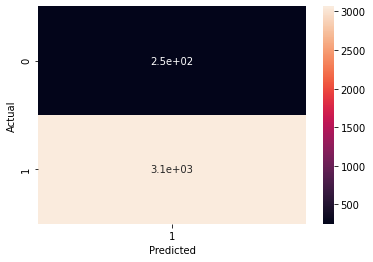

In [86]:
df = pd.DataFrame(one_hot_encoded_cols, columns=[y,pred_st])
confusion_matrix = pd.crosstab(y, pred_st, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()